In [7]:
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
from scipy.spatial.distance import cdist
from scipy.stats import skew
from matplotlib.ticker import ScalarFormatter
import statsmodels.api as sm

In [8]:
orignal_dataframe = pd.read_excel(r'C:\Users\ljwil\OneDrive\Desktop\Data Analytics\Personal Projects\ESG Analysis\SP 500 ESG Risk Ratings.xlsx', sheet_name='SP 500 ESG Risk Ratings')


In [9]:
rows_to_add=[]
for index, (esg_value, another_value,sector_name) in orignal_dataframe[['Total ESG Risk score', 'Full Time Employees','Sector']].iterrows():
    if pd.isna(esg_value) or pd.isna(another_value)or another_value == 'N/A' or pd.isna(sector_name):
          continue
    else:
         rows_to_add.append( orignal_dataframe.loc[index])


rows_df = pd.DataFrame(rows_to_add)
rows_df = rows_df.reset_index(drop=True)


total_esg_colum_y = rows_df['Total ESG Risk score']
total_worker_x = rows_df['Full Time Employees']
sector_colum = rows_df['Sector']

analysis_dataframe = pd.DataFrame({
    'Full Time Employees': total_worker_x,
    'Total ESG Risk score': total_esg_colum_y
    })

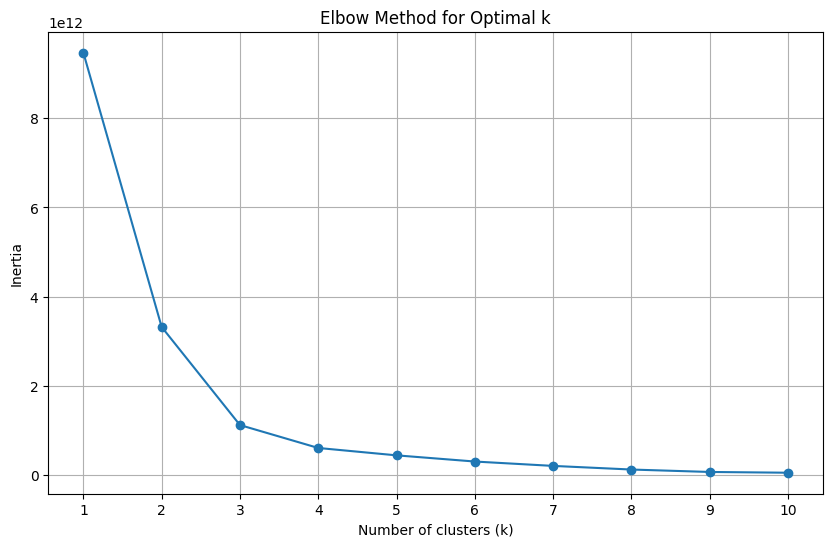

In [10]:
cluster_range = range(1, 11)  # Testing 1 to 10 clusters
inertia = []  # storing inertia values

for k in cluster_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(analysis_dataframe)
    inertia.append(kmeans.inertia_)  # Store the inertia value



plt.figure(figsize=(10, 6))
plt.plot(cluster_range, inertia, marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia')
plt.xticks(cluster_range)
plt.grid()
plt.show()

In [11]:

k_value_list = [2,3,4, 5,6]
silhouette_score_list = []
for k_value in k_value_list:
    kmeans = KMeans(n_clusters=k_value, random_state=0)  # Set the number of clusters
    analysis_dataframe['Cluster'] = kmeans.fit_predict(analysis_dataframe[['Full Time Employees', 'Total ESG Risk score']])
    silhouette_avg = silhouette_score(
        analysis_dataframe[['Full Time Employees', 'Total ESG Risk score']], 
        analysis_dataframe['Cluster']
    )
    print(f'Silhouette Score using {k_value}:\n{silhouette_avg}')
    silhouette_score_list.append(silhouette_avg)

Silhouette Score using 2:
0.8750647914519522
Silhouette Score using 3:
0.8237358046313263
Silhouette Score using 4:
0.7176976112800976
Silhouette Score using 5:
0.7149833488829309
Silhouette Score using 6:
0.6917955589667949


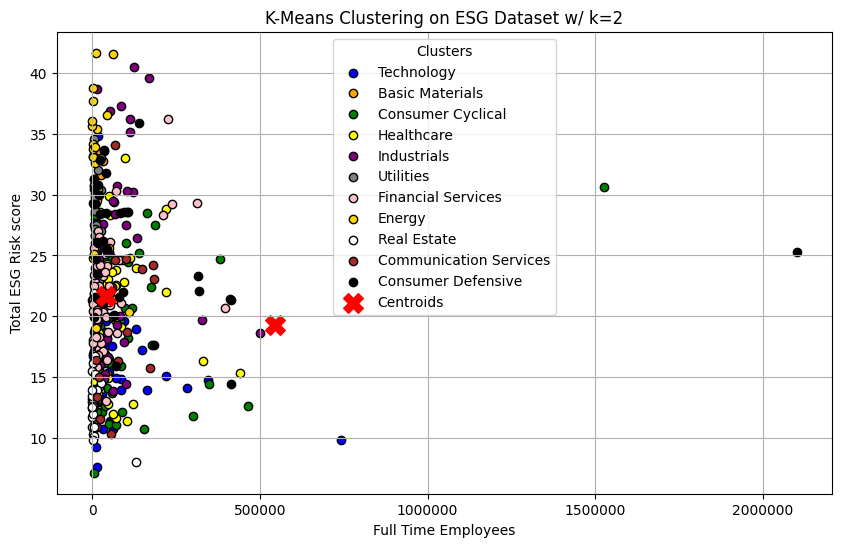

In [ ]:

kmeans = KMeans(n_clusters=2, random_state=0)  # Set the number of clusters

sector_labels = orignal_dataframe['Sector'].unique()
sector_labels = list(sector_labels)
sector_labels.remove(sector_labels[-1]) #removing nan

analysis_dataframe = pd.DataFrame({
    'Full Time Employees': total_worker_x,
    'Total ESG Risk score': total_esg_colum_y,
    'Sector':sector_colum})
analysis_dataframe['Cluster'] = kmeans.fit_predict(analysis_dataframe[['Full Time Employees', 'Total ESG Risk score']])


unique_clusters = analysis_dataframe['Cluster'].unique()
color_map = {cluster: color for cluster, color in zip(unique_clusters, ['blue','orange'])}
sector_color_map = {sector: color for sector, color in zip(sector_labels, ['blue', 'orange', 'green', 'yellow', 'purple','gray','pink','gold','white','brown','black'])}  # Extend this if needed





plt.figure(figsize=(10, 6))

for sector in sector_labels:
    sector_data = analysis_dataframe[analysis_dataframe['Sector'] == sector]
    plt.scatter(
        sector_data['Full Time Employees'], 
        sector_data['Total ESG Risk score'], 
        label=f'{sector}', 
        color=sector_color_map[sector], 
        edgecolor='k'
    )

# Plot the centroids
centers = kmeans.cluster_centers_
plt.scatter(
    centers[:, 0], 
    centers[:, 1], 
    c='red', 
    marker='X', 
    s=200, 
    label='Centroids'
)

plt.gca().xaxis.set_major_formatter(ScalarFormatter(useOffset=False))
plt.ticklabel_format(style='plain', axis='x')
# Add titles and labels
plt.title('K-Means Clustering on ESG Dataset w/ k=2')
plt.xlabel('Full Time Employees')
plt.ylabel('Total ESG Risk score')
plt.legend(title='Clusters', loc='best')
plt.grid(True)
plt.show()
